In [3]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [4]:
coords = ((0.0, 0.0),
 (0.0, 25.0),
 (0.0, 50.0),
 (0.0, 75.0),
 (0.0, 100.0),
 (0.0, 125.0),
 (0.0, 150.0),
 (0.0, 175.0),
 (0.0, 200.0),
 (0.0, 225.0),
 (18.0, -12.5),
 (18.0, 37.5),
 (18.0, 87.5),
 (18.0, 137.5),
 (18.0, 187.5),
 (18.0, 237.5),
 (18.0, 262.5),
 (18.0, 212.5),
 (18.0, 162.5),
 (18.0, 112.5),
 (18.0, 62.5),
 (18.0, 12.5),
 (36.0, 225.0),
 (36.0, 200.0),
 (36.0, 175.0),
 (36.0, 150.0),
 (36.0, 125.0),
 (36.0, 100.0),
 (36.0, 75.0),
 (36.0, 50.0),
 (36.0, 25.0),
 (36.0, 0.0))

In [5]:
chans = range(1,len(coords) + 1) #.prb files are 0-based, probe and connector maps are 1-based

(-130, 170)

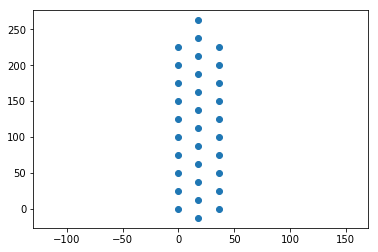

In [6]:
plt.plot([x for (x,y) in coords],[y for (x,y) in coords],'o')
plt.xlim([-130, 170])


In [7]:
#produces pairs of probe site adjacencies from the electrode coordinates in physical space through Delauney tesselation,
#subject to a maximum site spacing (in microns) of max_edgelength. 
import numpy as np
import scipy.spatial as spatial

def adjacency_from_geometry(coords, channels, max_edgelength = 40, correspondence = None):
        
    c = np.array(coords)
    tess = spatial.Delaunay(coords)
    indices, indptr = tess.vertex_neighbor_vertices
    adjs = []
    for k in range(indices.shape[0]-1):
        for j in indptr[indices[k]:indices[k+1]]:
            try:
                if(spatial.distance.euclidean(c[k], c[j]) < max_edgelength):
                    adjs.append((channels[k],channels[j]))
            except:
                pass
    return adjs
    

In [8]:
intan = ['G', 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 'R', 'R',24, 25, 26,
         27, 28, 29, 30, 31, 0, 1, 2, 3, 4, 5, 6, 7, 'G']
 
nexus = ['G',23,25,27,29,31,19,17,21,11,15,13,1,3,5,7,9,'R','R',24,26,28,30,32,20,18,22,12,16,14,2,4,6,
         8,10,'G']
cor = list(zip(nexus, intan))

In [9]:
def translate_adjacencies(adjacencies, correspondence=None):
    if correspondence is not None:
        for i,(x,y) in enumerate(adjacencies):
            adjacencies[i] = (translate(x, correspondence), translate(y,correspondence))
    return adjacencies

def translate(val, correspondence):
    return correspondence[[x for (x,y) in correspondence].index(val)][1]

In [10]:
b = adjacency_from_geometry(coords, chans, 40)
b_intan = translate_adjacencies(b, cor)

In [12]:
b_intan

[(12, 31),
 (12, 3),
 (12, 15),
 (3, 31),
 (3, 12),
 (3, 0),
 (3, 11),
 (11, 16),
 (11, 4),
 (11, 0),
 (11, 3),
 (4, 13),
 (4, 10),
 (4, 11),
 (4, 16),
 (10, 13),
 (10, 4),
 (10, 29),
 (10, 5),
 (5, 10),
 (5, 29),
 (5, 2),
 (5, 9),
 (9, 18),
 (9, 6),
 (9, 5),
 (9, 2),
 (6, 8),
 (6, 14),
 (6, 18),
 (6, 9),
 (8, 6),
 (8, 14),
 (8, 30),
 (8, 7),
 (7, 1),
 (7, 8),
 (7, 30),
 (15, 31),
 (15, 12),
 (15, 28),
 (0, 11),
 (0, 3),
 (0, 19),
 (0, 27),
 (0, 16),
 (0, 31),
 (13, 10),
 (13, 4),
 (13, 20),
 (13, 26),
 (13, 16),
 (13, 29),
 (2, 5),
 (2, 9),
 (2, 21),
 (2, 25),
 (2, 18),
 (2, 29),
 (14, 8),
 (14, 6),
 (14, 30),
 (14, 24),
 (14, 22),
 (14, 18),
 (1, 17),
 (1, 23),
 (1, 7),
 (1, 30),
 (17, 1),
 (30, 8),
 (30, 7),
 (30, 1),
 (30, 23),
 (30, 14),
 (30, 24),
 (18, 6),
 (18, 9),
 (18, 25),
 (18, 22),
 (18, 14),
 (18, 2),
 (29, 10),
 (29, 5),
 (29, 21),
 (29, 26),
 (29, 13),
 (29, 2),
 (16, 20),
 (16, 27),
 (16, 11),
 (16, 4),
 (16, 13),
 (16, 0),
 (31, 3),
 (31, 12),
 (31, 15),
 (31, 28),
 (

In [2]:
from scipy import spatial
def get_graph_from_geometry(geometry):
    # let's transform the geometry into lists of channel names and coordinates
    chans,coords = zip(*[(ch,xy) for ch,xy in geometry.iteritems()])
    # we'll perform the triangulation and extract the
    try:
        tri = spatial.Delaunay(coords)
    except:
        x,y = zip(*coords)
        coords = list(coords)
        coords.append((max(x)+1,max(y)+1))
        tri = spatial.Delaunay(coords)
    # then build the list of edges from the triangulation
    indices, indptr = tri.vertex_neighbor_vertices
    edges = []
    for k in range(indices.shape[0]-1):
        for j in indptr[indices[k]:indices[k+1]]:
            try:
                edges.append((chans[k],chans[j]))
            except IndexError:
                # ignore dummy site
                pass
    return edges

def build_geometries(channel_groups):
    for gr, group in channel_groups.iteritems():
        group['graph'] = get_graph_from_geometry(group['geometry'])
    return channel_groups

def get_probe_channel_groups(probe):
    if probe.DesignType=='Linear':
        channel_groups = {}
        for shank in range(int(probe.NumShank)):
            channel_groups[shank] = {}
            sites = shank*int(probe.NumSitePerShank) + np.arange(int(probe.NumSitePerShank))
            x_locs = [0.0 for s in sites]
            y_locs = [probe.TrueSiteSpacing * s for s in sites]
            channel_groups[shank]['channels'] = list(sites)
            channel_groups[shank]['geometry'] = {s:(x,y) for s,x,y in zip(sites,x_locs,y_locs)}
    return build_geometries(channel_groups)

from pprint import pformat
def save_probe(channel_groups,name):
    with open(name+'.prb', 'w') as f:
        f.write('channel_groups = ' + pformat(channel_groups))